In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from joblib import Memory
import joblib
import os
import warnings
import time
import mlflow
from mlflow.tracking import MlflowClient
import mlflow.pyfunc

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

In [3]:
# Set MLflow tracking URI
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

# Start MLflow experiment
mlflow.set_experiment("Exp7_Sonu_Flipkart_Sentiment_MLflow")


<Experiment: artifact_location='mlflow-artifacts:/767500214777306223', creation_time=1711872008477, experiment_id='767500214777306223', last_update_time=1711872008477, lifecycle_stage='active', name='Exp7_Sonu_Flipkart_Sentiment_MLflow', tags={}>

In [4]:
import numpy as np
import pandas as pd
import os
import sys

print(os.getcwd())  # This will print the current working directory


PATH = r"C:\Users\Sonu Vikas\Desktop\Internship 2024\Flipkart Product\MLFLOW 2\data.csv"

df = pd.read_csv(PATH)
dataFrame=df

C:\Users\Sonu Vikas\Desktop\Internship 2024\Flipkart Product\mlflow


In [5]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [6]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [7]:
df.tail()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [8]:
df.shape

(8518, 8)

In [9]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [10]:
df.describe

<bound method NDFrame.describe of                Reviewer Name               Review Title  \
0               Kamal Suresh               Nice product   
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
3        Suresh Narayanasamy                       Fair   
4                  ASHIK P A                Over priced   
...                      ...                        ...   
8513                     NaN                        NaN   
8514                     NaN                        NaN   
8515                     NaN                        NaN   
8516                     NaN                        NaN   
8517                     NaN                        NaN   

                  Place of Review  Up Votes  Down Votes     Month  \
0      Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1      Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2     Certified Buyer, Dharmapuri      42.0       

In [11]:
#Renaming the Columns
df.columns = df.columns.str.strip()

df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [13]:
# Check for missing values
print(df.isnull().sum())

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64


In [14]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


# Handling missing / Null values

In [15]:
df.fillna({'Reviewer Name': 'Anonymous', 
           'Review Title': 'No Title', 
           'Place of Review': 'Unknown', 
           'Up Votes': df['Up Votes'].median(), 
           'Down Votes': df['Down Votes'].median(), 
           'Month': 'Unknown'}, 
          inplace=True)


In [16]:
# Check for missing values
print(df.isnull().sum())

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        8
Ratings            0
dtype: int64


In [17]:
df.tail()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,5
8514,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,2
8515,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,4
8516,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,1
8517,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,4


In [18]:
# Convert 'Month' column to datetime data type
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

In [19]:
# Convert 'Up Votes' and 'Down Votes' columns to integer data type
df['Up Votes'] = df['Up Votes'].astype(int)
df['Down Votes'] = df['Down Votes'].astype(int)

In [20]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')

# Check the updated data types and column names
print(df.dtypes)
print(df.columns)

Reviewer_Name              object
Review_Title               object
Place_of_Review            object
Up_Votes                    int32
Down_Votes                  int32
Month              datetime64[ns]
Review_text                object
Ratings                     int64
dtype: object
Index(['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Up_Votes',
       'Down_Votes', 'Month', 'Review_text', 'Ratings'],
      dtype='object')


# Summary Statistics

In [21]:
print(df.describe())


          Up_Votes   Down_Votes      Ratings
count  8518.000000  8518.000000  8518.000000
mean      0.390937     0.121625     4.181028
std      11.607097     3.246117     1.262200
min       0.000000     0.000000     1.000000
25%       0.000000     0.000000     4.000000
50%       0.000000     0.000000     5.000000
75%       0.000000     0.000000     5.000000
max     889.000000   219.000000     5.000000


# Interpretation:
The majority of reviews have zero up votes and down votes, as indicated by the 25th, 50th, and 75th percentiles.
However, there are some outliers with a maximum of 889 up votes and 219 down votes.
The ratings range from 1 to 5, with a mean rating of approximately 4.18, indicating generally positive sentiment among reviewers.
These statistics provide valuable insights into the distribution and variability of up votes, down votes, and ratings among the reviews. They can guide further analysis and decision-making processes related to customer satisfaction and engagement with the product.

In [22]:
# Distribution of ratings
print(df['Ratings'].value_counts())

5    5080
4    1746
1     769
3     615
2     308
Name: Ratings, dtype: int64


# Data Vizualization
## distribution analysis

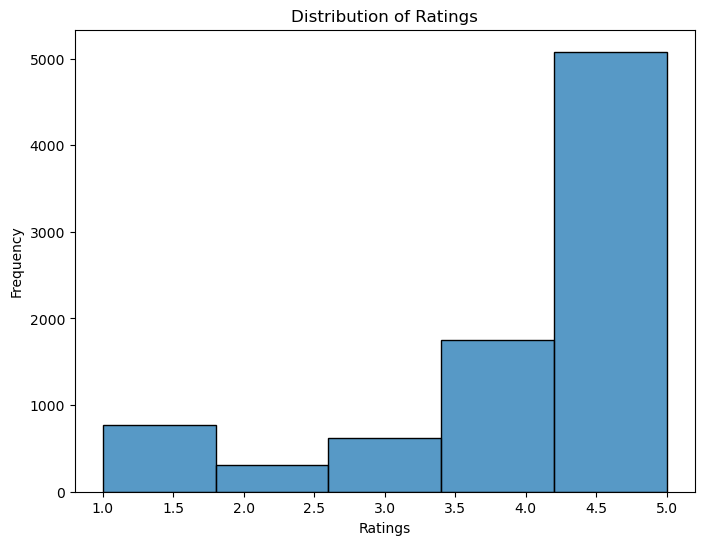

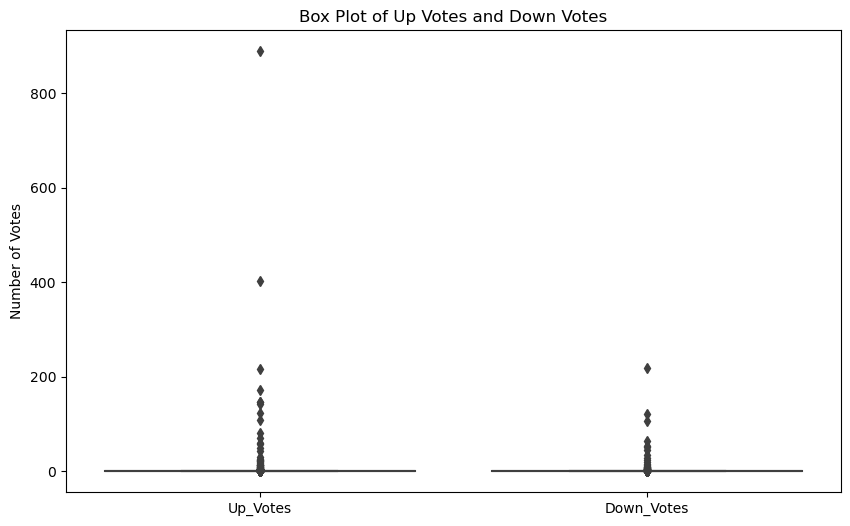

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Ratings'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# Box plot of Up Votes and Down Votes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Up_Votes', 'Down_Votes']])
plt.title('Box Plot of Up Votes and Down Votes')
plt.ylabel('Number of Votes')
plt.show()


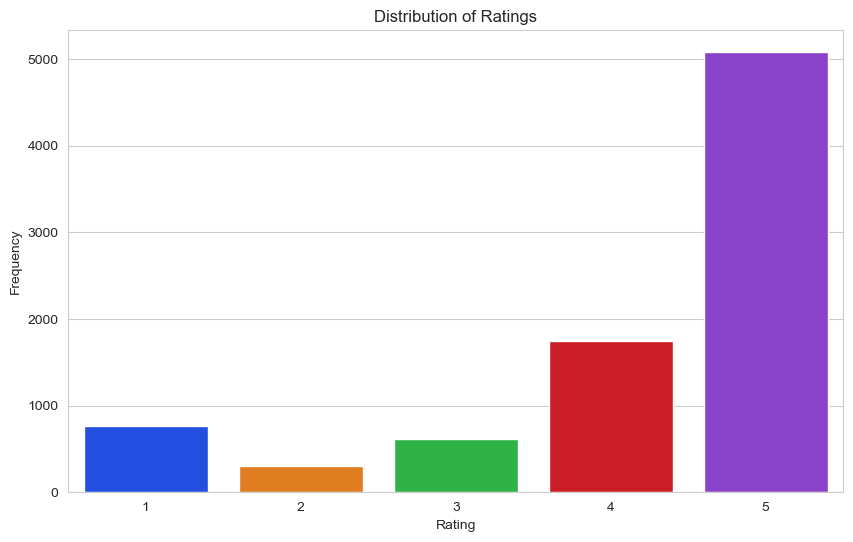

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df'

# Drop rows with NaN values in 'Ratings' column
df.dropna(subset=['Ratings'], inplace=True)

# Convert 'Ratings' column to integer type
df['Ratings'] = df['Ratings'].astype(int)

# Set seaborn style
sns.set_style("whitegrid")

# Define a color palette
palette = sns.color_palette("bright")

# Distribution analysis using bar chart with different colors
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ratings', palette=palette)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.xticks(rotation=0)
plt.show()

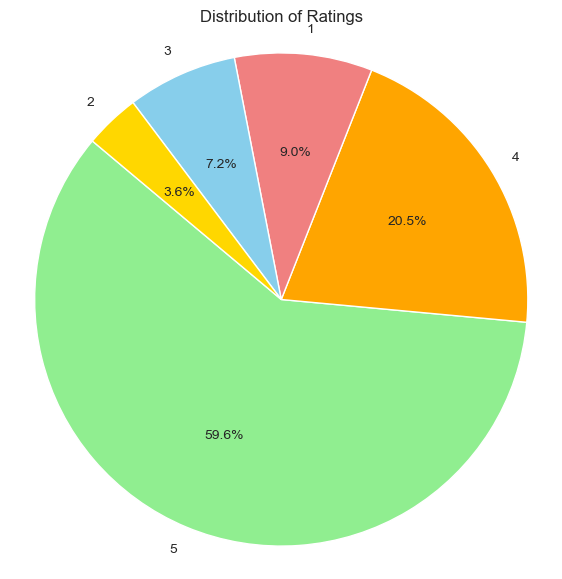

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'

# Drop rows with NaN values in 'Ratings' column
df.dropna(subset=['Ratings'], inplace=True)

# Convert 'Ratings' column to integer type
df['Ratings'] = df['Ratings'].astype(int)

# Distribution analysis using pie chart
plt.figure(figsize=(7, 7))
rating_counts = df['Ratings'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'orange', 'lightcoral', 'skyblue', 'gold'])
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.show()

# Analyzing the Relationship between Ratings and Engagement Metrics:

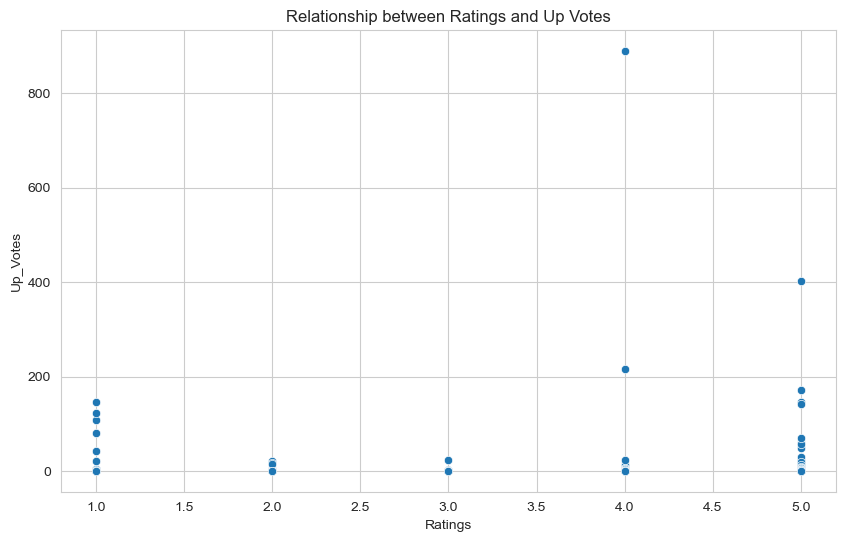

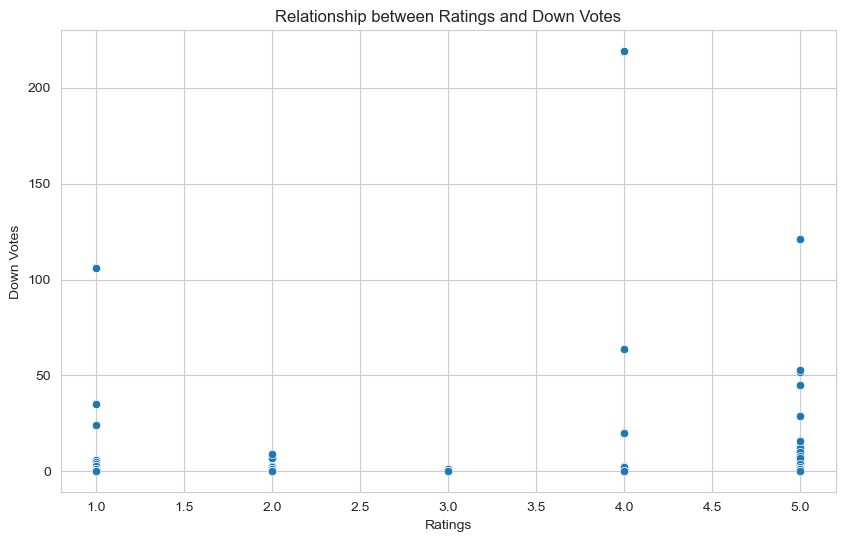

In [26]:
import seaborn as sns

# Scatter plot to visualize the relationship between Ratings and Up Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Up_Votes')
plt.title('Relationship between Ratings and Up Votes')
plt.xlabel('Ratings')
plt.ylabel('Up_Votes')
plt.show()

# Scatter plot to visualize the relationship between Ratings and Down Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Down_Votes')
plt.title('Relationship between Ratings and Down Votes')
plt.xlabel('Ratings')
plt.ylabel('Down Votes')
plt.show()


# Categorical Variable analysis

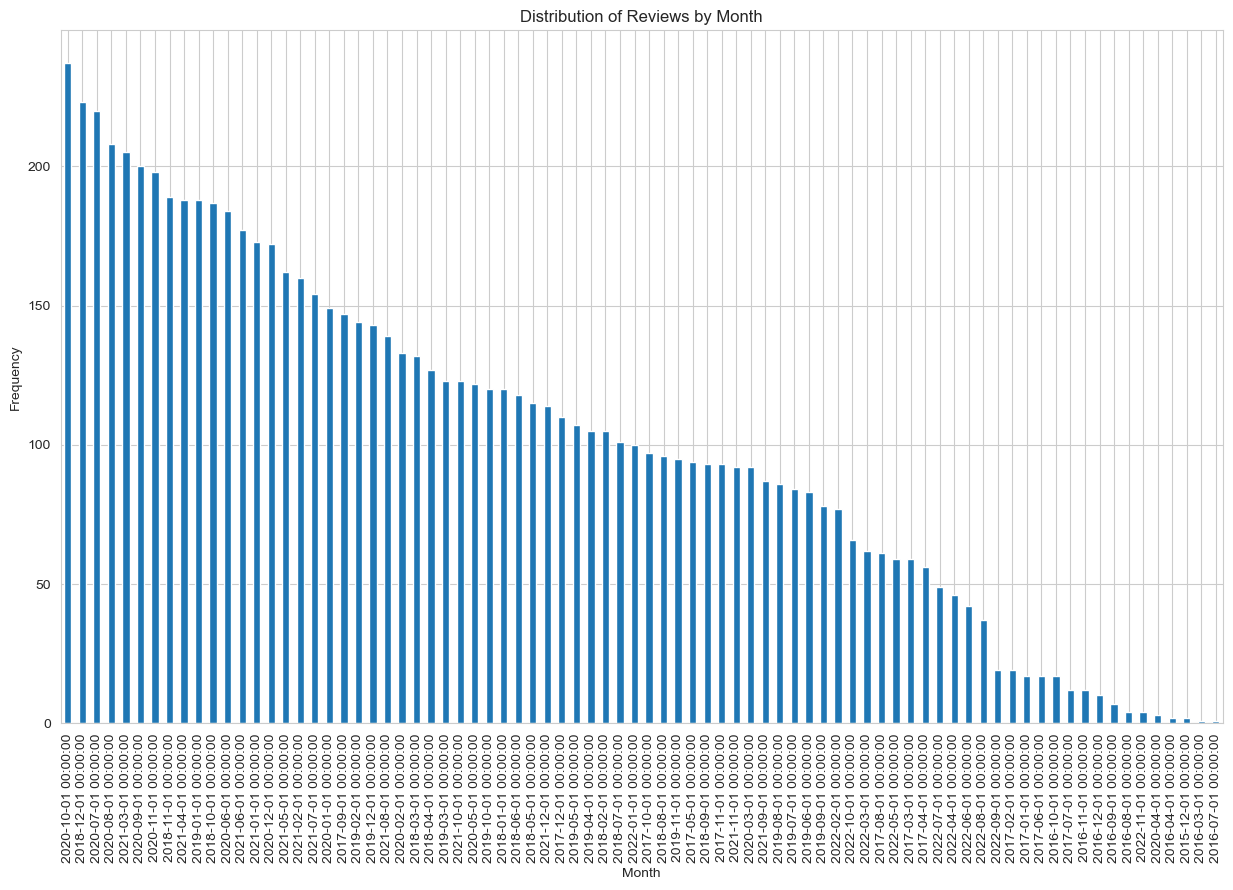

In [27]:
plt.figure(figsize=(15, 9))
df['Month'].value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews by Month')
plt.xticks(rotation=90)
plt.show()


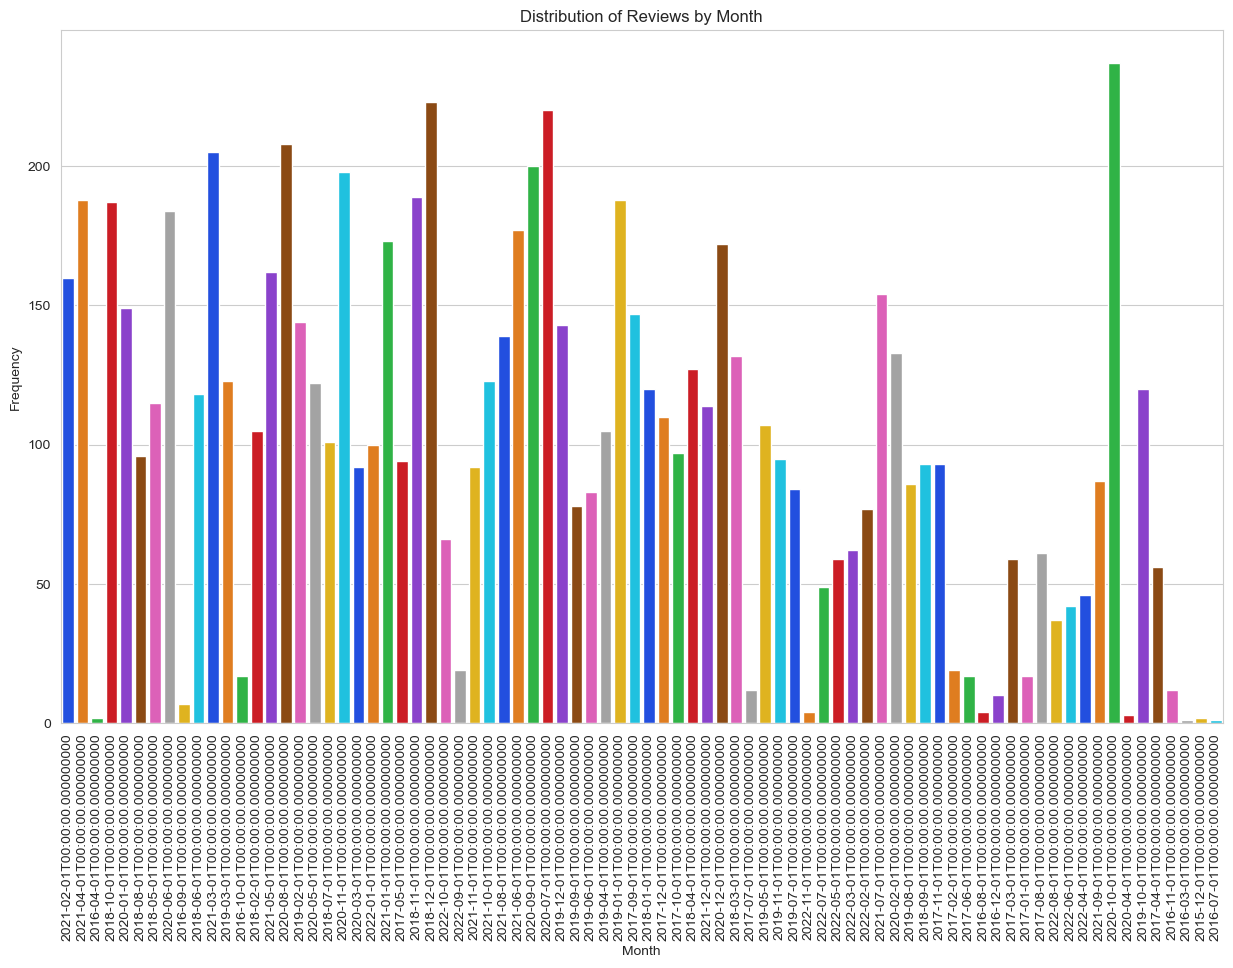

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palettes

# Assuming df['Month'] contains the months as strings

plt.figure(figsize=(15, 9))

# Using seaborn's color palette 'muted'
sns.countplot(x='Month', data=df, palette='bright')

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews by Month')
plt.xticks(rotation=90)
plt.show()

# Sentiment Analysis on text data

In [29]:
# Perform sentiment analysis using TextBlob
# from textblob import TextBlob

# def get_sentiment(text):
#    analysis = TextBlob(text)
#    if analysis.sentiment.polarity > 0:
#        return 'Positive'
#    elif analysis.sentiment.polarity < 0:
#        return 'Negative'
#    else:
#        return 'Neutral'

# Apply sentiment analysis to the 'Review Text' column
#df['Sentiment'] = df['Review_text'].apply(get_sentiment)

# Visualize sentiment distribution
# plt.figure(figsize=(8, 6))
# sns.countplot(x='Sentiment', data=df)
# plt.title('Sentiment Distribution')
# plt.xlabel('Sentiment')
# plt.ylabel('Count')
# plt.show()


In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to C:\Users\Sonu
[nltk_data]     Vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
def get_sentiment_nltk(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        scores = sid.polarity_scores(text)
        if scores['compound'] > 0:
            return 'Positive'
        elif scores['compound'] < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'  # Return 'Neutral' for NaN values


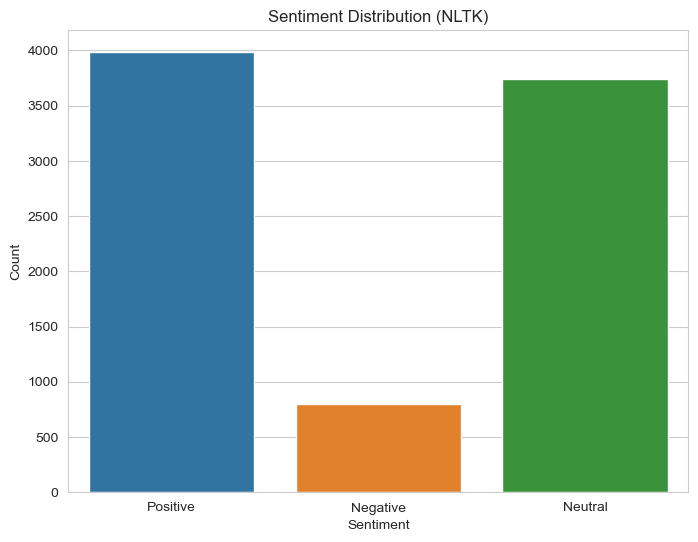

In [32]:
# Apply sentiment analysis to the 'Review_text' column
df['Sentiment_NLTK'] = df['Review_text'].apply(get_sentiment_nltk)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_NLTK', data=df)
plt.title('Sentiment Distribution (NLTK)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Text Data 

In [33]:
# Distribution on target variable looks non-uniform
df['Sentiment_NLTK'].value_counts(normalize=True)

Positive    0.467598
Neutral     0.438835
Negative    0.093567
Name: Sentiment_NLTK, dtype: float64

In [34]:
# removing the data where we don't want, i.e.'netural'.
df = df[df.Sentiment_NLTK != "Neutral"]

df.shape

(4780, 9)

In [35]:

df['Sentiment_NLTK'].value_counts(normalize=True)

Positive    0.833264
Negative    0.166736
Name: Sentiment_NLTK, dtype: float64

# Iam choosing Sentiment_NLTK for sentiment analysis

In [36]:
# Define a dictionary to map sentiment categories to numerical values
sentiment_mapping = {'Positive': 1, 'Negative': 0}

# Map sentiment categories to numerical values in the 'Sentiment_NLTK' column
df['Sentiment_NLTK_numeric'] = df['Sentiment_NLTK'].map(sentiment_mapping)

# Display the updated DataFrame
print(df[['Sentiment_NLTK', 'Sentiment_NLTK_numeric']].head())


  Sentiment_NLTK  Sentiment_NLTK_numeric
0       Positive                       1
1       Negative                       0
2       Negative                       0
3       Positive                       1
4       Positive                       1


In [37]:
df.loc[0, 'Review_text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [38]:
# Let us take only the two columns we need
df = df[["Review_text", "Sentiment_NLTK_numeric"]] 
df.shape

(4780, 2)

# Step 1 - Identify Input and Output

In [39]:
# Step 1: Identify Input and Output

X = df.Review_text # the column text contains textual data to extract features from
y = df.Sentiment_NLTK_numeric # this is the column we are learning to predict. 
print(X.shape, y.shape)

(4780,) (4780,)


# Step 2 - Split the Data into Train and Test

In [40]:
# Step 2: Split the data into train and test

from sklearn.model_selection import train_test_split

# split X and y into training and testing sets. 
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3585,) (3585,)
(1195,) (1195,)


# Step 3 - Data Preprocessing on train data (X_train)

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

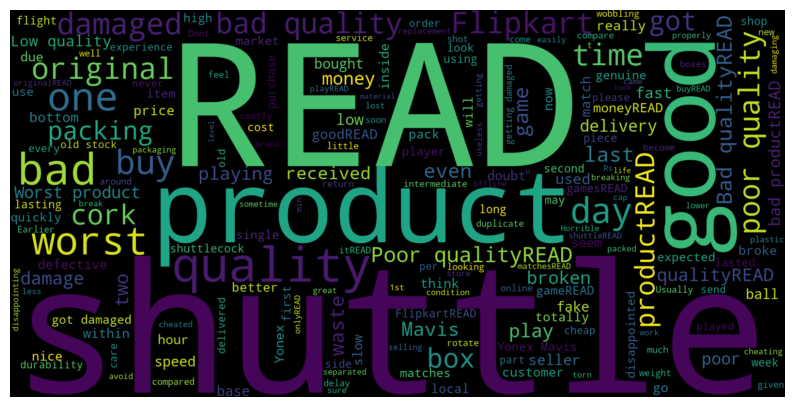

In [42]:
# Import the required modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to display word cloud
def display_wordcloud(data):
    # Generate the word cloud with the default font
    wc = WordCloud(background_color='black', width=1600, height=800).generate(' '.join(data))

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Assuming X_train contains Flipkart review text data
# and y_train contains corresponding sentiment labels
# Display the word cloud for positive sentiment Flipkart reviews
display_wordcloud(X_train[y_train ==0])


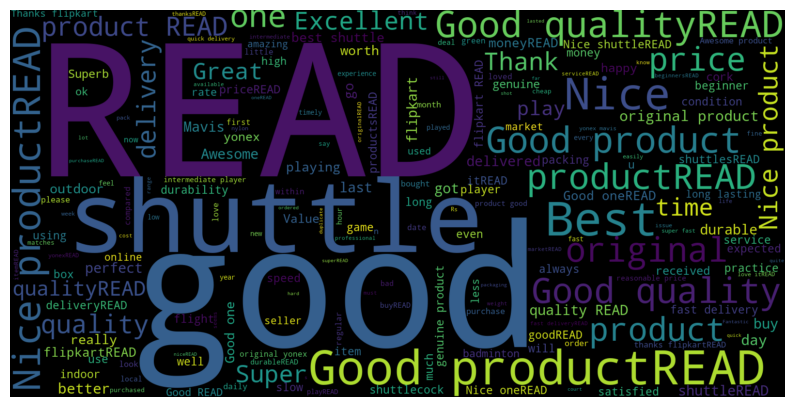

In [43]:
# Display the wordcloud for Flipkart reviews

display_wordcloud(X_train[y_train==1])

In [44]:
# Step 3: Data Preprocessing on train data (X_train)

import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [45]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Sonu
[nltk_data]     Vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [47]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: total: 7.19 s
Wall time: 7.59 s
(3585, 2547)


# Step 4 - Data Preprocessing on test data (X_test) 

In [48]:
# Step 4: Data Preprocessing on test data (X_test)

# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(1195, 2547)


# Step 5 - Building a Model (i.e. Train the classifier)

In [49]:
# Step 5: Building a Model (i.e. Train the classifier)

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: total: 0 ns
Wall time: 3.99 ms


MultinomialNB()

# Step 6 - Evaluating on Train Data

In [50]:
# Step 6: Evaluate on train data

from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9617852161785216

In [51]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 503,   99],
       [  38, 2945]], dtype=int64)

Text(0.5, 25.52222222222222, 'Predicted')

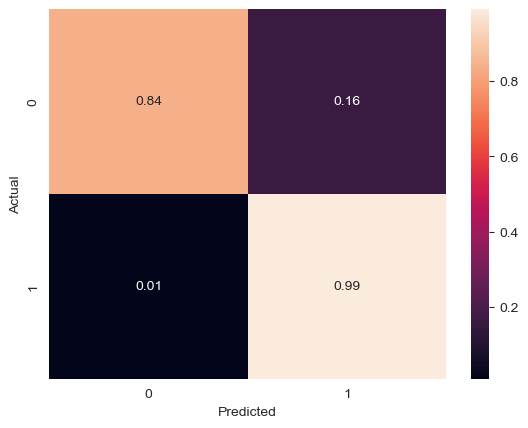

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')


# Step 7 - Evaluate on Test Data

In [53]:
# Step 7: Evaluate on test data

# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.9372384937238494

Text(0.5, 25.52222222222222, 'Predicted')

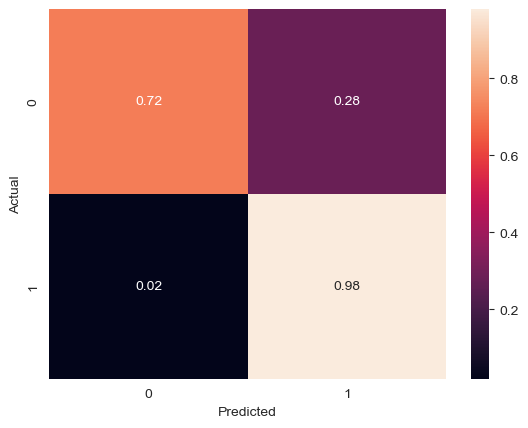

In [54]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [55]:
# # Understand that accuracy is influenced in the presence of data imbalance
# # Let's change the metric to F1 Score

print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.977268956363033
Test Score (F1 Score): 0.9631087063453025


In [56]:
df = pd.read_csv(r'C:\Users\Sonu Vikas\Desktop\Internship 2024\Flipkart Product\MLFLOW 2\data.csv')

df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [57]:
# Select relevant columns
df = df[["Review Title", "Review text", "Ratings"]]

# Preprocess the text and assign sentiment labels
df['Sentiment'] = df['Ratings'].apply(lambda rating: 'negative' if rating <= 2 else 'positive')

df.head()

,Review Title,Review text,Ratings,Sentiment
0,Nice product,"Nice product, good quality, but price is now r...",4,positive
1,Don't waste your money,They didn't supplied Yonex Mavis 350. Outside ...,1,negative
2,Did not meet expectations,Worst product. Damaged shuttlecocks packed in ...,1,negative
3,Fair,"Quite O. K. , but nowadays the quality of the...",3,positive
4,Over priced,Over pricedJust â?¹620 ..from retailer.I didn'...,1,negative


In [58]:
# Split the data into features and target
X = df[['Review text']]
y = df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess text function
# nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text)
    text = text.replace('READ MORE', '')
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r':\)|:\(|:\D|:\S', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_text = [word for word in words if word not in stop_words]
    filtered_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    return " ".join(filtered_text)

# Apply preprocessing to training and test data
X_train['clean_text'] = X_train['Review text'].apply(preprocess_text)
X_test['clean_text'] = X_test['Review text'].apply(preprocess_text)

In [59]:
# Define models and pipelines
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ]),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ]),
    'svm': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ])
}

# Define parameter grids
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'random_forest': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'svm': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__kernel': ['linear', 'rbf', 'poly'],
            'classifier__C': [0.1, 1, 10],
        }
    ]
}

In [60]:
# Perform GridSearchCV for each algorithm
for algo in pipelines.keys():
    # Start main run for the model
    with mlflow.start_run(run_name=algo):
        print("*"*10, algo, "*"*10)
        grid_search = GridSearchCV(estimator=pipelines[algo],
                                   param_grid=param_grids[algo],
                                   cv=5,
                                   scoring='f1',
                                   return_train_score=True,
                                   verbose=1
                                  )

        grid_search.fit(X_train['clean_text'], y_train)

        # Log parameters for the main run
        best_params = grid_search.best_params_
        mlflow.log_params(best_params)

        # Log metrics for the main run
        best_model = grid_search.best_estimator_
        train_f1 = f1_score(y_train, best_model.predict(X_train['clean_text']), pos_label='positive')
        test_f1 = f1_score(y_test, best_model.predict(X_test['clean_text']), pos_label='positive')
        train_accuracy = accuracy_score(y_train, best_model.predict(X_train['clean_text']))
        test_accuracy = accuracy_score(y_test, best_model.predict(X_test['clean_text']))

        mlflow.log_metric("train_f1", train_f1)
        mlflow.log_metric("test_f1", test_f1)
        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("test_accuracy", test_accuracy)

        print('Best Train F1 Score:', train_f1)
        print('Best Test F1 Score:', test_f1)
        print('Best Train Accuracy:', train_accuracy)
        print('Best Test Accuracy:', test_accuracy)

        # Log the model for the main run
        mlflow.sklearn.log_model(best_model, "model")

        # Log each individual run's details
        for i, params in enumerate(grid_search.cv_results_['params']):
            with mlflow.start_run(nested=True, run_name=f"Run-{i+1}"):
                # Fit the pipeline with the current parameters
                pipeline = Pipeline([
                    ('vectorization', params['vectorization']),
                    ('classifier', pipelines[algo]['classifier'])  # Use the classifier of the pipeline
                ])
                pipeline.set_params(**params)
                pipeline.fit(X_train['clean_text'], y_train)

                # Calculate metrics for the individual run
                train_f1 = f1_score(y_train, pipeline.predict(X_train['clean_text']), pos_label='positive')
                test_f1 = f1_score(y_test, pipeline.predict(X_test['clean_text']), pos_label='positive')
                train_accuracy = accuracy_score(y_train, pipeline.predict(X_train['clean_text']))
                test_accuracy = accuracy_score(y_test, pipeline.predict(X_test['clean_text']))

                # Log parameters for the individual run
                mlflow.log_params(params)

                # Log metrics for the individual run
                mlflow.log_metric("train_f1", train_f1)
                mlflow.log_metric("test_f1", test_f1)
                mlflow.log_metric("train_accuracy", train_accuracy)
                mlflow.log_metric("test_accuracy", test_accuracy)

                # Log the model for the individual run
                mlflow.sklearn.log_model(pipeline, "model")


2024/03/31 16:04:40 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logged at level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Train F1 Score: 0.9579439252336448
Best Test F1 Score: 0.9572649572649573
Best Train Accuracy: 0.9260346345758732
Best Test Accuracy: 0.9237089201877934
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Train F1 Score: 0.9841508174841508
Best Test F1 Score: 0.9434336751571287
Best Train Accuracy: 0.9721162312885236
Best Test Accuracy: 0.8996478873239436
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Train F1 Score: 0.9323818640675311
Best Test F1 Score: 0.93383613301337
Best Train Accuracy: 0.8859700616378046
Best Test Accuracy: 0.8867370892018779
********** random_forest **********
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Train F1 Score: 0.9841772151898734
Best Test F1 Score: 0.9530332681017611
Best Train Accuracy: 0.9721162312885236
Best Test Accur

In [61]:
# Load and evaluate the models from MLflow
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)

    # Load model from MLflow
    client = MlflowClient()
    runs = client.search_runs(experiment_ids=[262937134810022706], filter_string=f"tags.mlflow.runName = '{algo}'")
    run_id = runs[0].info.run_id
    model = mlflow.sklearn.load_model(f"runs:/{run_id}/model")

    # Measure prediction time
    start_time = time.time()

    y_test_pred = model.predict(X_test['clean_text'])

    # Calculate prediction time
    prediction_time = time.time() - start_time
    
    # Log prediction time to MLflow
    mlflow.log_metric("prediction_time", prediction_time)

    # Calculate and print evaluation metrics
    test_f1 = f1_score(y_test, y_test_pred, pos_label='positive')
    classification_rep = classification_report(y_test, y_test_pred)
    print("Test F1 Score:", test_f1)
    print("Classification Report:")
    print(classification_rep)
    print("Prediction Time:", prediction_time, "seconds")

********** naive_bayes **********


Test F1 Score: 0.9572649572649573
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.59      0.64       199
    positive       0.95      0.97      0.96      1505

    accuracy                           0.92      1704
   macro avg       0.83      0.78      0.80      1704
weighted avg       0.92      0.92      0.92      1704

Prediction Time: 0.025931835174560547 seconds
********** decision_tree **********


Test F1 Score: 0.942384105960265
Classification Report:
              precision    recall  f1-score   support

    negative       0.57      0.54      0.55       199
    positive       0.94      0.95      0.94      1505

    accuracy                           0.90      1704
   macro avg       0.75      0.74      0.75      1704
weighted avg       0.90      0.90      0.90      1704

Prediction Time: 0.04886937141418457 seconds
********** logistic_regression **********


Test F1 Score: 0.93383613301337
Classification Report:
              precision    recall  f1-score   support

    negative       0.51      0.75      0.61       199
    positive       0.96      0.90      0.93      1505

    accuracy                           0.89      1704
   macro avg       0.74      0.83      0.77      1704
weighted avg       0.91      0.89      0.90      1704

Prediction Time: 0.02094411849975586 seconds
********** random_forest **********


Test F1 Score: 0.9576822916666666
Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.52      0.61       199
    positive       0.94      0.98      0.96      1505

    accuracy                           0.92      1704
   macro avg       0.85      0.75      0.79      1704
weighted avg       0.92      0.92      0.92      1704

Prediction Time: 0.08477234840393066 seconds
********** svm **********


Test F1 Score: 0.9559870550161812
Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.46      0.57       199
    positive       0.93      0.98      0.96      1505

    accuracy                           0.92      1704
   macro avg       0.85      0.72      0.76      1704
weighted avg       0.91      0.92      0.91      1704

Prediction Time: 0.12765789031982422 seconds


In [62]:
# # Sample prediction using a model
# model = mlflow.sklearn.load_model("runs:/1b4fddbdaf3b43f58b38914759d2071b/model")

new_data = [
    "The Product is ridiculously awesome"
]

new_data_clean = [preprocess_text(doc) for doc in new_data]

prediction = model.predict(new_data_clean)

print("Prediction:", prediction)


Prediction: ['positive']
